# DSP - Aufgabenblatt 7

## Bewertete Übung

#### FHNW - HS2019

#### Vorgaben

Sie dürfen für die Lösung der Übung zusammenarbeiten, so lange sich ihre **Zusammenarbeit auf konzeptionelle und algorithmische Fragestellungen beschränkt**. Bei kopiertem Code oder Text (von Mitstudierenden oder dem Internet) werden alle Lösungen der beteiligten Parteien mit 0 Punkten bewertet. Dazu werden alle Lösungen manuell und automatisiert auf Kopien untersucht.  

#### Abgabe

Arbeiten Sie auf einem eigenen Fork des Repositories `https://gitlab.fhnw.ch/ml/courses/dsp/dsp_hs2019.git` zu welchem Sie den Dozenten (@michael.graber) als *Maintainer* hinzufügen. Committen Sie regelmässig. Als Abgabe gilt ihr **letzter Commit vor Montag, 18. November 2019, 24 Uhr**.

#### Hinweise
- Der *Code* muss auf `jhub.cs.technik.fhnw.ch` von Anfang bis Ende durchlaufen. Es wird nur funktionsfähiger Code bewertet.    
- Beschriften Sie sämtliche Achsen (Bezeichnung und Einheit wenn möglich).  
- Ergänzen Sie den Plot mit zusätzlicher Beschriftung falls dies notwendig ist zum Verständnis des Plots.  
- Diskutieren Sie jeden Plot und beginnen Sie dabei mit einer Beschreibung dessen was der Plot zeigt.  


- Versuchen Sie eine kompakte und performante Implementierung zu finden. Vollständige Punktzahl erreichen Sie bloss mit performantem *Code*.  

### Aufgabe 1 (8 Punkte)

Laden Sie das Bild `margaret_hamilton.jpg` aus dem Verzeichnis diese Übungsblatts.  

Was ist die Form und was die Dimensionalität des geladenen *arrays*?  
Wie viel Speicherplatz braucht es?  
Wie viel ein einzelnes Element des *arrays*?  
Was ist der Datentyp der *array*-Elemente?  
Vergleichen Sie Anzahl Elemente und benötigter Speicherplatz.

Machen diese Informationen Sinn zusammen? Begründen Sie.

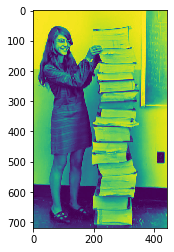

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.style.use('seaborn-muted')

img=mpimg.imread('margaret_hamilton.jpg')
imgplot = plt.imshow(img)

In [2]:
print("Items in Array: ", img.size)
print("Dimensions: ", img.shape)
print("Memory: %d bytes" % (img.nbytes))
print("Itemsize: %d byte" % (img.itemsize))
print("Check: %d bytes" % (img.size * img.itemsize))
print("Data Type: ", img.dtype)

Items in Array:  318517
Dimensions:  (719, 443)
Memory: 318517 bytes
Itemsize: 1 byte
Check: 318517 bytes
Data Type:  uint8


Das Array hat eine Dimension von 719 Zeilen und 443 Spalten, damit eine Grösse von 318517 und benötigt einen Speicherplatz von 318517 Bytes.
Die Grösse eines einzelnen Items ist 1 byte (0-255), was bei 318517 Items auf genau 318517 Bytes hinausläuft. Die Werte sind daher korrekt und sinnvoll.
Der Datentyp ist uint8, also ein Wertebereich von 0-255 (8 Bits, 1 Byte).

### Aufgabe 2 (3 Punkte)

Zeichnen Sie das Bild. Verwenden Sie Graustufen zur Kodierung der Pixelwerte.  

Was zeigt das Bild? Kennen Sie die Person?

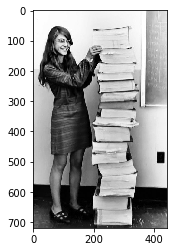

In [3]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

Das Bild zeigt die Informatikerin Margaret Hamilton, wie sie neben ihrem Code für einen Computer des Kommandomoduls der Apollo-Mission steht.

### Aufgabe 3 (2 Punkte)

Spiegeln Sie das Bild horizontal und zeichnen Sie es erneut.  

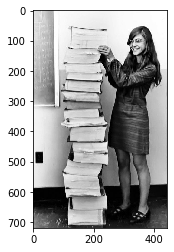

In [4]:
img2 = np.fliplr(img)
plt.imshow(img2, cmap='gray')
plt.show()

### Aufgabe 4 (6 Punkte)

Zeichnen Sie ein Histogramm der Pixelwerte.  

Zwischen welchen Werten streuen die Pixelwerte?  
Was ist eine sinnvoll gewählte Anzahl *Bins*? Begründen Sie. 

Zeichnen Sie Median und Mittelwert mit ins Histogramm als vertikale Linien und kennzeichnen Sie diese.

minValue:  0
maxValue:  255


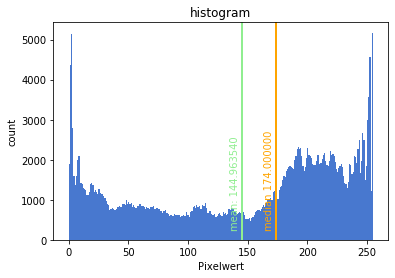

In [5]:
import numpy as np

print('minValue: ', np.amin(img))
print('maxValue: ', np.amax(img))

mean = np.mean(img)
median = np.median(img)

plt.hist(img.ravel(), bins=255, histtype='bar') 
plt.title("histogram")
plt.xlabel('Pixelwert')
plt.ylabel('count')
plt.axvline(mean, color='lightgreen', linewidth=2)
plt.text(mean-10,300,'mean: %f' % mean,rotation=90, color='lightgreen')
plt.axvline(median, color='orange', linewidth=2)
plt.text(median-10,300,'median %f' % median,rotation=90, color='orange')
plt.show()

Die Werte streuen zwischen 0 und 255. Theoretisch wäre eine Anzahl Bins von 256 sinnvoll, da man so die Anzahl jedes möglichen Werts gut einsehen kann.
Da aber 256 Klassen eine hohe Anzahl ist und dies zu schlechter Performance fühhren kann, macht es Sinn diese zu reduzieren, z.B. auf 8. 
Innerhalb dieser 8 Klassen sind immer noch die unterschiedlichen Werte sichtbar.

### Aufgabe 5 (6 Punkte)

Nun 'Binarisieren' wir unser Originalbild: Berechnen Sie zwei neue Bilder, welche jeweils sämtliche Werte kleiner dem Mittelwert, bzw. dem Median, gleich 0 gesetzt haben, alle Werte darüber gleich 1.  

Zeichnen Sie beide Bilder.  

Unterscheiden sich die Bilder stark? Wieso?

In [6]:
def toBinary(img, thresh):
    imgCopy = img.copy()
    shape = imgCopy.shape
    for i in range(shape[0]):
        for j in range(shape[1]): 
            if (imgCopy[i,j] <= thresh):
                imgCopy[i,j] = 0
            else:
                imgCopy[i,j] = 1
    return imgCopy

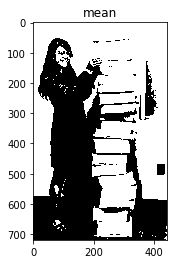

In [7]:
imgMean = toBinary(img, mean)
plt.imshow(imgMean, cmap='gray')
plt.title('mean')
plt.show()

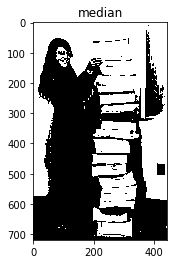

In [8]:
imgMedian = toBinary(img, median)
plt.imshow(imgMedian, cmap='gray')
plt.title('median')
plt.show()

Die Bilder unterscheiden sich nur geringfügig, weil sich Mean und Median relativ nahe beinander befinden. Das Bild, das den Mean als Threshold verwendet, hat etwas mehr weisse Stellen als das Bild aus dem Median. Das liegt daran, dass der Mean kleiner ist als der Median. 

### Aufgabe 6 (5 Punkte)

Berechnen und zeichnen Sie für das Originalbild das normalisierte Histogramm $p(v)$ und die normalisierte kumulative Verteilung der Pixelwerte $P(v)$. Verwenden Sie für die Berechnung beider Funktionen *Bins* der Grösse 1 zwischen 0 und (inklusive) maximalem Bildwert. Die Funktionswerte für das normalisierte Histogramm entsprechen dabei dem Anteil Werte in einem *Bin*. Die normalisierte kumulative Verteilung entspricht dem Anteil der Pixelwerte welche den Wert $v$ oder kleiner annehmen:

\begin{equation}
P(v) = \sum_{i=0}^v p(i)
\end{equation}

Zeichnen Sie die Funktionen als Stufenfunktionen mit der `matplotlib`-Funktion `step` und berechnen Sie die kumulative Summe mit `np.cumsum`.

255


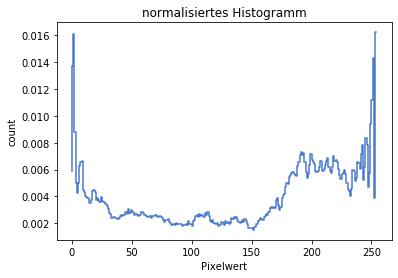

In [9]:
counts, _ = np.histogram(img, bins=255, density='1')
print(counts.size)
x = np.arange(0, counts.size, 1)
plt.step(x, counts)
plt.title("normalisiertes Histogramm")
plt.xlabel('Pixelwert')
plt.ylabel('count')
plt.show()

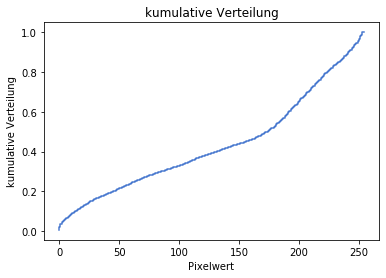

In [10]:
cumsum = np.cumsum(counts)
plt.step(x,cumsum)
plt.title("kumulative Verteilung")
plt.xlabel('Pixelwert')
plt.ylabel('kumulative Verteilung')
plt.show()

### Aufgabe 7 (5 Punkte)

Berechnen und zeichnen Sie den kumulativen Mittelwert $m(v)$ der Pixelwerte. Der kumulative Mittelwert ist definiert als  

\begin{equation}
m(v) = \sum_{i=0}^{v} i\cdot p(i)
\end{equation}  


Was ist der grösste Wert der kumulativen Mittelwert-Funktion? Was entspricht er? Erklären Sie.

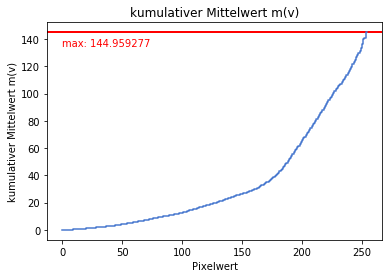

In [11]:
mv = np.empty(counts.size)
sum = 0
for i in range(mv.size):
    sum += i * counts[i]
    mv[i] = sum
mv_max = np.amax(mv)
plt.axhline(mv_max, color='red', linewidth=2)
plt.text(0,mv_max-10,'max: %f' % mv_max, color='red')
plt.step(x, mv)
plt.title("kumulativer Mittelwert m(v)")
plt.xlabel('Pixelwert')
plt.ylabel('kumulativer Mittelwert m(v)')
plt.show()

Der kumulative Mittelwert zeigt das Arithmetische Mittel der Werte aller Pixel bis zu einem bestimmten Wertebereich von t (siehe Formel). Wenn man nun alle Pixelwerte berücksichtigt, entspricht das genau dem dem arithmetischen Mittel der Werte aller Pixel (höchste Wert).

### Aufgabe 8  (6 Punkte)

*Otsu's Method* (Otsu, 1979) ist ein Algorithmus zur Berechnung eines Schwellwerts für die Binarisierung von Bildern. Ziel von *Otsu's Method* ist es, die Varianz zwischen den beiden Wertebereichen zu maximieren.  

Zur Umsetzung des Algorithmus haben wir in den Aufgaben 6 und 7 schon einiges vorbereitet. Wir brauchen nämlich $p(v), P(v)$ und $m(v)$. Mit ihrer Hilfe können wir die Varianz zwischen den Pixelwerten aus den beiden Wertebereichen für einen beliebigen Schwellwert $t$ berechnen.

\begin{equation}
\sigma^{2}(t) = \frac{(max(m(\cdot))P(t) - m(t))^2}{P(t)(1-P(t))}
\end{equation}  

Berechnen Sie $\sigma^2(t)$ für alle möglichen $t$ und zeichnen Sie die Funktion.  

*Otsu's* Schwellwert ist bei jenem $t$ zu wählen, für welches $\sigma^2(t)$ maximal ist (sollte das Maximum nicht eindeutig sein, so wird über die verschiedenen Kandidaten gemittelt).  


Schreiben Sie nun eine Funktion `otsu_threshold(image)`, welche den Otsu Schwellwert für ein beliebiges Graustufenbild berechnet.

Was ist *Otsu's* Schwellwert für unser Originalbild?

In [12]:
import math

def otsu_threshold(image):
    p, _ = np.histogram(image, bins=255, density='1')
    x = np.arange(0, counts.size, 1)
    
    #P(t)
    P = np.cumsum(p)
    
    #m(t) 
    m = np.empty(p.size)
    sum = 0
    for t in range(m.size):
        sum += x[t] * p[t]
        m[t] = sum
    
    #m(max)
    m_max = np.amax(m)
    
    #sqr_sigma(t)
    otsu = np.empty(p.size)
    maxIndex = 0
    for t in range(p.size):
        otsu[t] = (((m_max * P[t]) - m[t]) ** 2) / (P[t] * (1 - P[t]))
    
    max = np.nanmax(otsu)
    thresh = list(otsu).index(max)
    
    return thresh, otsu, x

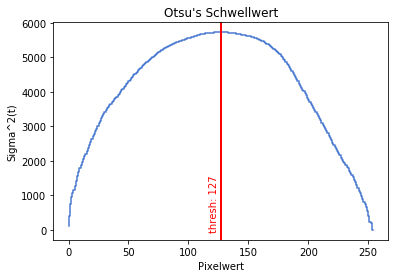

In [13]:
image = mpimg.imread('margaret_hamilton.jpg')
thresh, otsu, x = otsu_threshold(image)
plt.step(x, otsu)
plt.title("Otsu's Schwellwert")
plt.xlabel('Pixelwert')
plt.ylabel('Sigma^2(t)')
plt.text(thresh-10,0,'thresh: %d' % thresh,rotation=90, color='red')
plt.axvline(thresh, color='red', linewidth=2)
plt.show()

Für unser Originalbild ist Otsu's Schwellwert 127. 

### Aufgabe 9 (5 Punkte)

Zeichnen Sie erneut ein Histogramm und dazu Mittelwert, Median und *Otsu's* Schwellwert als vertikale Linie.  

Zeichnen Sie dann ein Bild welches mit *Otsu's* Schwellwert binarisiert wurde.  

Was stellen Sie fest? Beschreiben Sie Ihre Erkenntnisse.

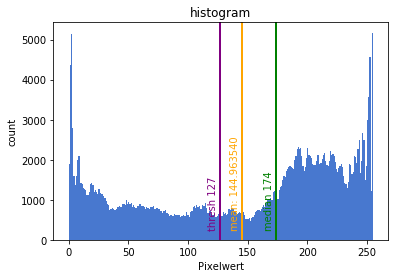

In [14]:
def drawHist(image):
    mean = np.mean(image)
    median = np.median(image)
    thresh, _, _ = otsu_threshold(image)

    plt.hist(img.ravel(), bins=255, histtype='bar') 
    plt.title("histogram")
    plt.xlabel('Pixelwert')
    plt.ylabel('count')
    plt.axvline(mean, color='orange', linewidth=2)
    plt.text(mean-10,300,'mean: %f' % mean,rotation=90, color='orange')
    plt.axvline(median, color='green', linewidth=2)
    plt.text(median-10,300,'median %d' % median,rotation=90, color='green')
    plt.axvline(thresh, color='purple', linewidth=2)
    plt.text(thresh-10,300,'thresh %d' % thresh,rotation=90, color='purple')
    plt.show()

image = mpimg.imread('margaret_hamilton.jpg')
drawHist(image)

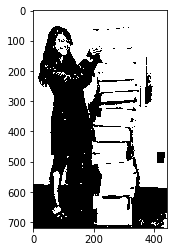

In [15]:
otsu_thresh, _, _ = otsu_threshold(image)
imgOtsu = toBinary(image, otsu_thresh)
plt.imshow(imgOtsu, cmap='gray')
plt.show()

Da der Otsu's Schwellenwert geringer ist als mean und median hat das Bild mehr Weisstöne als wenn es mit den anderen Schwellenwerten gezeichnet wurde.

### Aufgabe 10 (10 Punkte)

Implementieren Sie zum Schluss eine Klasse, welche lokale Otsu-Schwellwerte berechnet.  
Dabei soll bei der Objektinitialisierung eine Fenstergrösse definiert werden (*default value = 15*) können.

Nun soll eine Methode `otsu_threshold_local(image)` ein 'rollendes Fenster' von Fenstergrösse mal Fenstergrösse über das gesamte Bild in x- und y-Richtung schieben. Auf jedem Fenster berechnen wir mit einer Funktion wie in Aufgabe 8 den Otsu-Schwellwert und bestimmen damit lokal, ob der Pixel in der Mitte des Fensters 0 oder 1 gesetzt werden soll.  
Verwenden Sie an den Rändern 'unvollständige Fenster'.  

Messen Sie die Zeit, welche ihre Implementierung braucht, um ein lokal binarisiertes Bild mit *default* Fenstergrösse zu berechnen.  

Wie beurteilen Sie das Resultat dieser Binarisierung?  
Wann könnte dieses lokale Verfahren von Vorteil sein?

In [16]:
class Otsu():
    
    windowSize = 15
    
    def __init__(self, value):
        self.windowSize = value
        
        
    def otsu_threshold_local(self, image):
        imageCopy = image.copy()
        shape = np.shape(imageCopy)
        steps = (self.windowSize - 1) // 2
        for i in range (shape[0]):
            for j in range (shape[1]):
                window = [[0 for n in range(self.windowSize)] for m in range(self.windowSize)] 
                for x in range(self.windowSize):
                    for y in range(self.windowSize):
                        if(i-steps+x > 0 and i-steps+x < shape[0] 
                           and j-steps+y > 0 and j-steps+y < shape[1]): 
                            window[x][y] = imageCopy[i-steps+x][j-steps+y]
                thresh = self.otsuThreshold(window)
                if(imageCopy[i][j] <= thresh):
                    imageCopy[i][j] = 0
                else:
                    imageCopy[i][j] = 1
        plt.imshow(imageCopy, cmap='gray')
        plt.show()
                
                            
    
    def otsuThreshold(self, window):
        p, _ = np.histogram(window, bins=255, density='1')
        x = np.arange(0, counts.size, 1)
    
        #P(t)
        P = np.cumsum(p)
    
        #m(t) 
        m = np.empty(p.size)
        sum = 0
        for t in range(m.size):
            sum += x[t] * p[t]
            m[t] = sum
    
        #m(max)
        m_max = np.nanmax(m)
    
        #sqr_sigma(t)
        otsu = np.empty(p.size)
        maxIndex = 0
        for t in range(p.size):
            if(P[t] * (1 - P[t]) == 0):
                otsu[t] = 0
            else:
                otsu[t] = (((m_max * P[t]) - m[t]) ** 2) / (P[t] * (1 - P[t]))
    
        thresh = np.argmax(otsu)
    
        return thresh

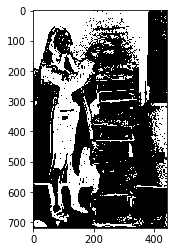

time elapsed:  519.3365535736084


In [17]:
import time

start = time.time()

img = mpimg.imread('margaret_hamilton.jpg')
otsu = Otsu(15)
otsu.otsu_threshold_local(img)

end = time.time()
print("time elapsed: ", end - start)

Die lokale Binarisierung ist im Vergleich zu den anderen bei margaret_hamilton bild relativ schlecht. Teilweise werden Bereiche, die eigentlich hell sind dunkel abgebildet und umgekehrt. Die lokale Binarisierung könnte aber in Bildern von Vorteilen sein, lokale Ähnlichkeiten haben. Zum Beispiel wenn es bei einem generell dunklen Bild einen sehr hellen Bereich hat, würde dort eine lokale Binarisierung Sinn machen. Oder beispielsweise bei einem Bild, dass aus mehreren einzelne Bildern besteht (collage). Dort würde einem die Werte der anderen Teilbildern nicht interessieren für die Binarisierung eines einzelnen Teilbilds.